### Imported libreries

In [2]:
# Data manipulation

import pandas as pd
import numpy as np

# Modeling

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt

### Selection of the best dataset

In [3]:
X_train_WITH_outliers = pd.read_excel("../data/processed/X_train_WITH_outliers.xlsx")
X_train_WITH_outliers_norm = pd.read_excel("../data/processed/X_train_WITH_outliers_norm.xlsx")
X_train_WITH_outliers_scal = pd.read_excel("../data/processed/X_train_WITH_outliers_scal.xlsx")
X_train_WITHOUT_outliers = pd.read_excel("../data/processed/X_train_WITHOUT_outliers.xlsx")
X_train_WITHOUT_outliers_norm = pd.read_excel("../data/processed/X_train_WITHOUT_outliers_norm.xlsx")
X_train_WITHOUT_outliers_scal = pd.read_excel("../data/processed/X_train_WITHOUT_outliers_scal.xlsx")

X_test_WITH_outliers = pd.read_excel("../data/processed/X_test_WITH_outliers.xlsx")
X_test_WITH_outliers_norm = pd.read_excel("../data/processed/X_test_WITH_outliers_norm.xlsx")
X_test_WITH_outliers_scal = pd.read_excel("../data/processed/X_test_WITH_outliers_scal.xlsx")
X_test_WITHOUT_outliers = pd.read_excel("../data/processed/X_test_WITHOUT_outliers.xlsx")
X_test_WITHOUT_outliers_norm = pd.read_excel("../data/processed/X_test_WITHOUT_outliers_norm.xlsx")
X_test_WITHOUT_outliers_scal = pd.read_excel("../data/processed/X_test_WITHOUT_outliers_scal.xlsx")


y_train = pd.read_excel("../data/processed/y_train.xlsx")
y_test = pd.read_excel("../data/processed/y_test.xlsx")

In [6]:
train_datasets = {
    "WITH_outliers": X_train_WITH_outliers,
    "WITH_outliers_norm": X_train_WITH_outliers_norm,
    "WITH_outliers_scal": X_train_WITH_outliers_scal,
    "WITHOUT_outliers": X_train_WITHOUT_outliers,
    "WITHOUT_outliers_norm": X_train_WITHOUT_outliers_norm,
    "WITHOUT_outliers_scal": X_train_WITHOUT_outliers_scal
}

test_datasets = {
    "WITH_outliers": X_test_WITH_outliers,
    "WITH_outliers_norm": X_test_WITH_outliers_norm,
    "WITH_outliers_scal": X_test_WITH_outliers_scal,
    "WITHOUT_outliers": X_test_WITHOUT_outliers,
    "WITHOUT_outliers_norm": X_test_WITHOUT_outliers_norm,
    "WITHOUT_outliers_scal": X_test_WITHOUT_outliers_scal
}

models = {}
metrics = {}

for name, X_train  in train_datasets.items():
  X_test = test_datasets[name]
  model = DecisionTreeClassifier()
  model.fit(X_train , y_train)
  y_pred = model.predict(X_train)

  acc = accuracy_score(y_train, y_pred)
  f1 = f1_score(y_train, y_pred)
  prec = precision_score(y_train, y_pred)
  rec = recall_score(y_train, y_pred)

  models[name] = model
  metrics[name] = {
        "Accuracy": acc,
        "F1": f1,
        "Precision": prec,
        "Recall": rec
  }

  print(
        f"{name}: "
        f"Accuracy={acc:.4f}, "
        f"F1={f1:.4f}, "
        f"Precision={prec:.4f}, "
        f"Recall={rec:.4f}"
    )
    
best_dataset_name = max(metrics, key=lambda k: metrics[k]["Accuracy"])
best_model = models[best_dataset_name]
best_X_train = train_datasets[best_dataset_name]
best_X_test = test_datasets[best_dataset_name]


print("\n================ CONCLUSION ================")
print(f"Best dataset: {best_dataset_name}")
print(f"Accuracy: {metrics[best_dataset_name]['Accuracy']:.4f}")
print(f"F1-score: {metrics[best_dataset_name]['F1']:.4f}")
print(f"Precision: {metrics[best_dataset_name]['Precision']:.4f}")
print(f"Recall: {metrics[best_dataset_name]['Recall']:.4f}")

WITH_outliers: Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000
WITH_outliers_norm: Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000
WITH_outliers_scal: Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000
WITHOUT_outliers: Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000
WITHOUT_outliers_norm: Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000
WITHOUT_outliers_scal: Accuracy=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000

================ CONCLUSION ================
Best dataset: WITH_outliers
Accuracy: 1.0000
F1-score: 1.0000
Precision: 1.0000
Recall: 1.0000


It appears we have overfitting, so let's optimize and see if we can reduce it and improve the model.

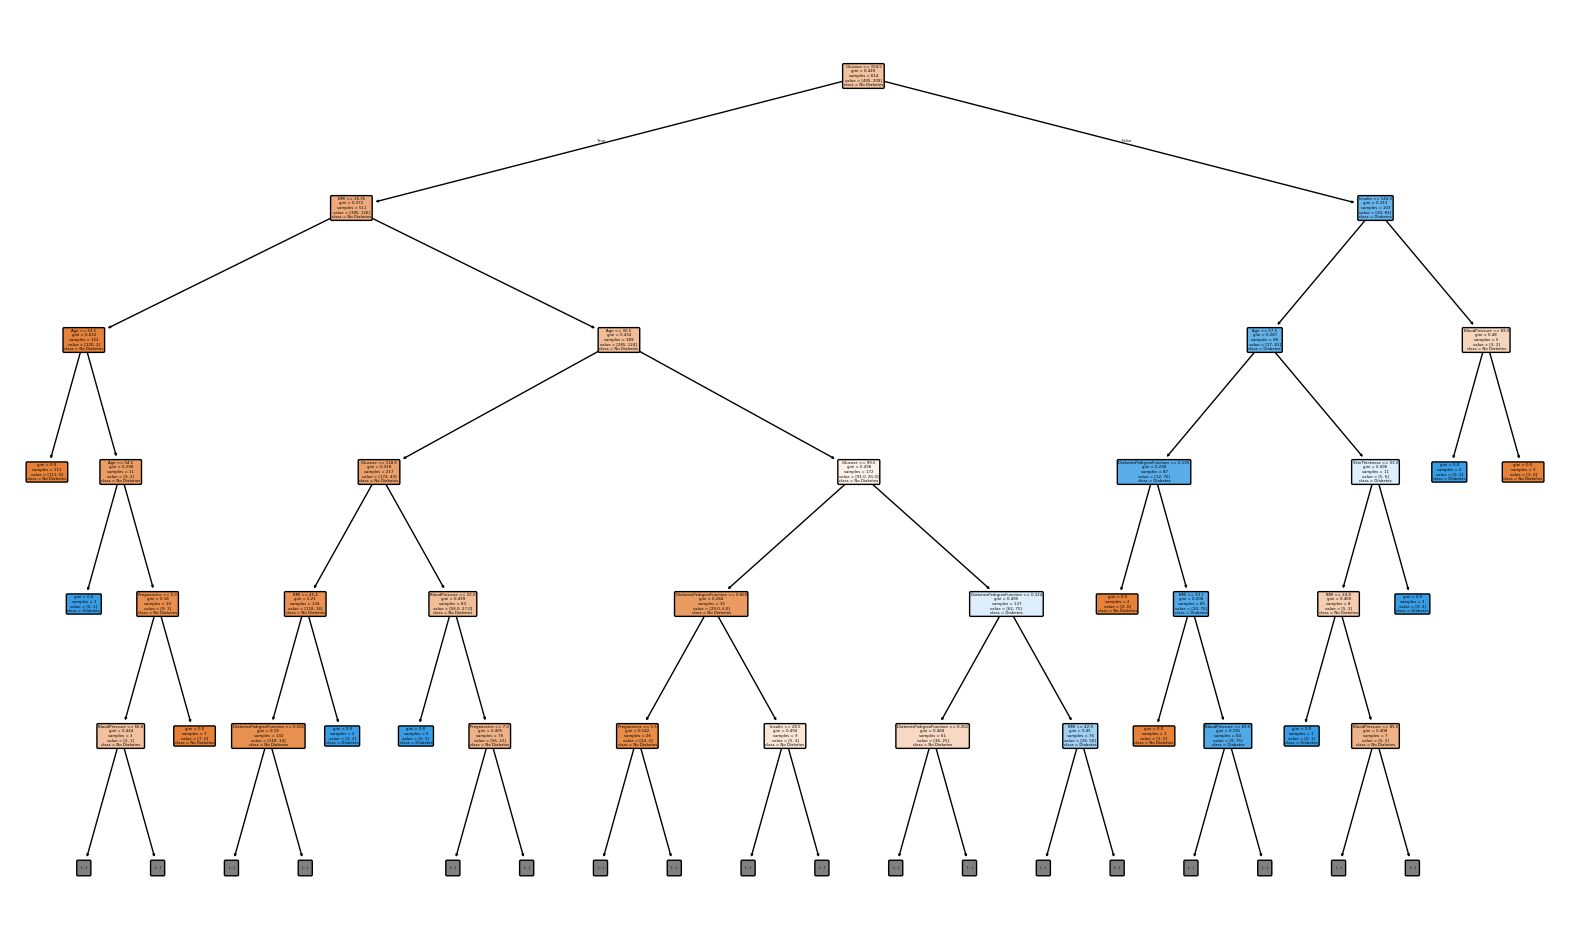

In [7]:
best_model = models[best_dataset_name]

plt.figure(figsize=(20, 12))

tree.plot_tree(
    best_model,
    feature_names=best_X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    max_depth=5
)
plt.show()

### Hyperparameter optimization

In [16]:
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 10, 20, 50],
    "min_samples_leaf": [1, 5, 10, 20]
}

params_prueba = {
    "max_depth": [3, 5, 7, 10, None],
}

#### Grid Search

In [25]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=10),
    params,
    scoring = "f1",
    cv= 5,
    n_jobs = -1)

grid_search.fit(best_X_train, y_train) # Entreno el optimizador con el dataset GANADOR

print("\n================ FINAL CONCLUSION ================")
print("Best params:", grid_search.best_params_)
best_model_grid = grid_search.best_estimator_
print("The best model is: ", best_model_grid)
print("The score for this model is: ", grid_search.best_score_)


================ FINAL CONCLUSION ================
Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
The best model is:  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=10)
The score for this model is:  0.6508137957750361


#### Random Search

In [11]:
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=10),
    params,
    scoring="f1",
    cv=5,
    n_iter=50,
    random_state=10,
    n_jobs=-1
)
random_search.fit(best_X_train, y_train) # Entreno el optimizador con el dataset GANADOR

print("\n================ FINAL CONCLUSION ================")
print("Best params:", random_search.best_params_)
best_model_random = random_search.best_estimator_
print("The best model is: ", best_model_random)
print("The score for this model is: ", random_search.best_score_)


================ FINAL CONCLUSION ================
Best params: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}
The best model is:  DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       min_samples_split=20, random_state=10)
The score for this model is:  0.6487462775282656


In [12]:
final_model = DecisionTreeClassifier(max_depth=5, random_state=10)
final_model.fit(best_X_train, y_train)

y_pred_train = final_model.predict(best_X_train)

acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print("========== TRAIN METRICS ==========")
print(f"Accuracy: {acc_train:.4f}")
print(f"F1-score: {f1_train:.4f}")
print(f"Precision: {prec_train:.4f}")
print(f"Recall: {rec_train:.4f}")
print("Confusion Matrix:\n", cm_train)
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))



y_pred_test = final_model.predict(best_X_test)

acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

print("========== TEST METRICS ==========")
print(f"Accuracy: {acc_test:.4f}")
print(f"F1-score: {f1_test:.4f}")
print(f"Precision: {prec_test:.4f}")
print(f"Recall: {rec_test:.4f}")
print("Confusion Matrix:\n", cm_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

========== TRAIN METRICS ==========
Accuracy: 0.8290
F1-score: 0.7287
Precision: 0.7921
Recall: 0.6746
Confusion Matrix:
 [[368  37]
 [ 68 141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       405
           1       0.79      0.67      0.73       209

    accuracy                           0.83       614
   macro avg       0.82      0.79      0.80       614
weighted avg       0.83      0.83      0.83       614

========== TEST METRICS ==========
Accuracy: 0.7597
F1-score: 0.6408
Precision: 0.7500
Recall: 0.5593
Confusion Matrix:
 [[84 11]
 [26 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82        95
           1       0.75      0.56      0.64        59

    accuracy                           0.76       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154



We have improved the "f1" metric by 0.0779 points, which represents 11.97%.

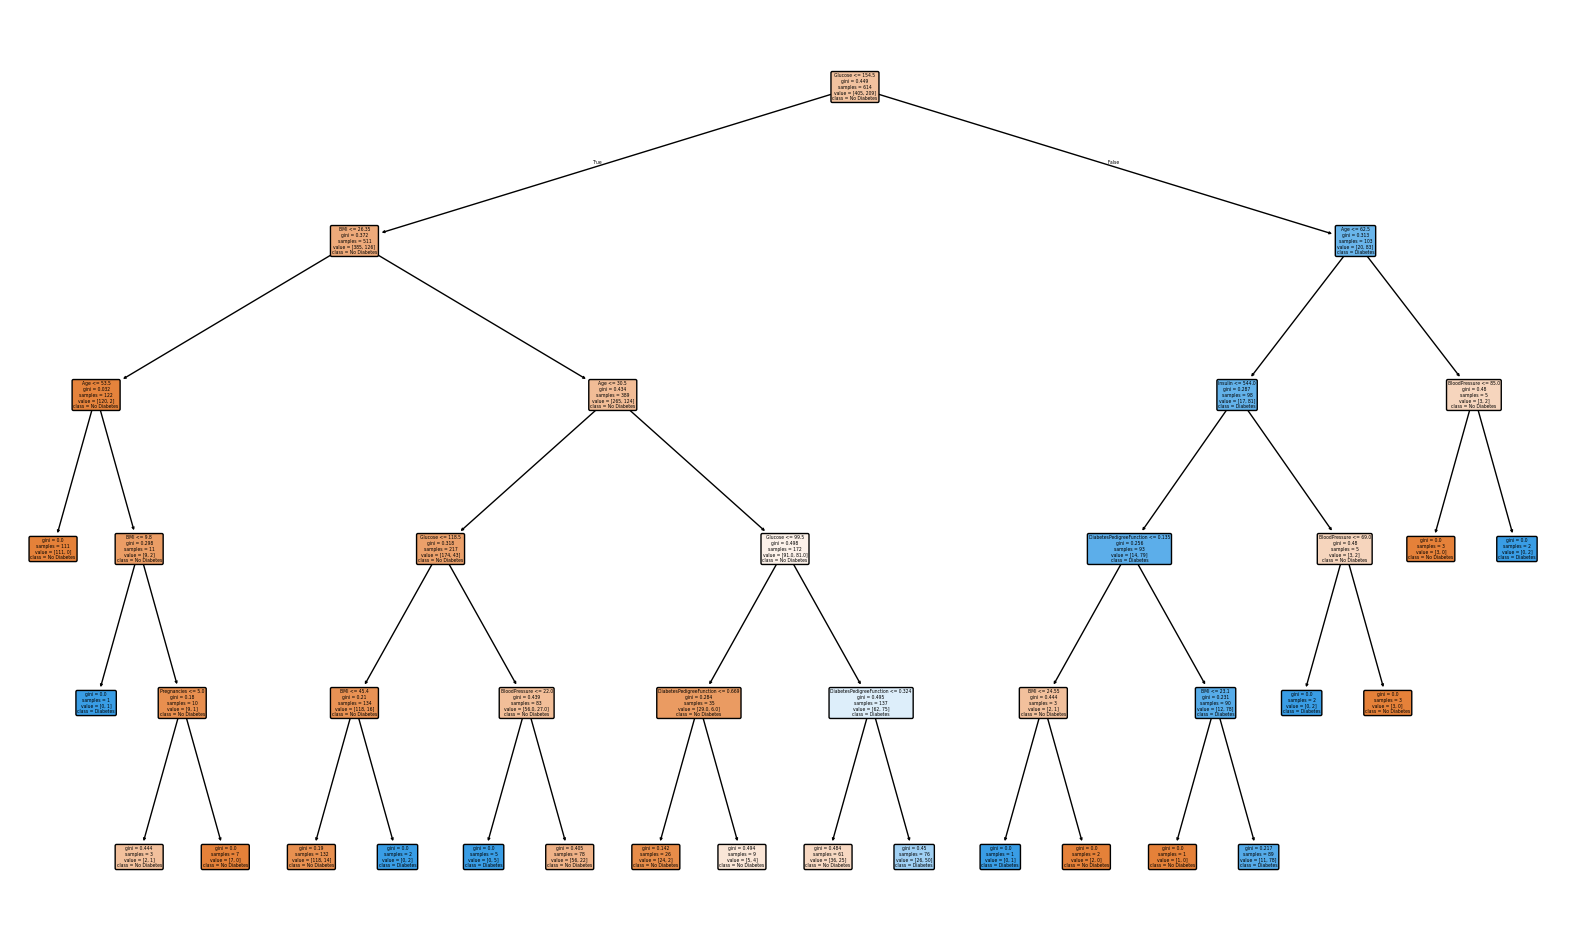

In [13]:
plt.figure(figsize=(20,12))
tree.plot_tree(final_model, feature_names=best_X_train.columns,
               class_names=["No Diabetes","Diabetes"],
               filled=True, rounded=True, max_depth=5)
plt.show()